In [208]:
import numpy as np
import rasterio
import pickle
import matplotlib.pyplot as plt

In [209]:
dx='0.25'
grid=pickle.load(open('../goes/grid'+dx+'.p','rb'))
maps=pickle.load(open('/home/tsw35/soteria/neon_code/goes/0.25x0.25_arcdegree/cl_2019-07-03 00:00:00p','rb'))
fp=rasterio.open('/stor/soteria/hydro/shared/data/GOES/GOES-16-EPSG4326/2019/OR_ABI-L2-LSTC-M6_G16_s20191831101248_e20191831104021_c20191831104423.tif')
tif=fp.read(1)
maps=maps['maps']

In [210]:
dt = fp.read(2)

In [211]:
dt.shape

(1752, 4106)

In [212]:
fp.index(-90,23)

(1401, 2567)

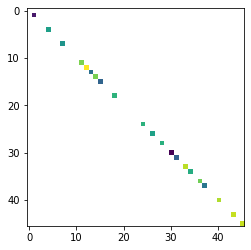

In [213]:
plt.imshow(maps['mean'][:])

In [214]:
maps['mean'][0:5,0]

array([nan, nan, nan, nan, nan])

/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


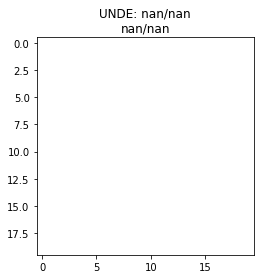

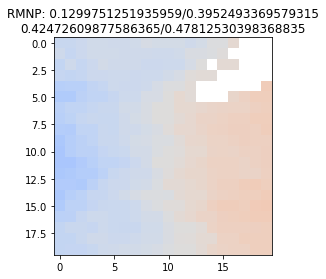

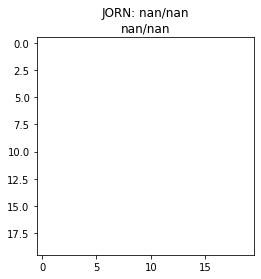

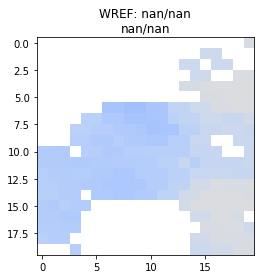

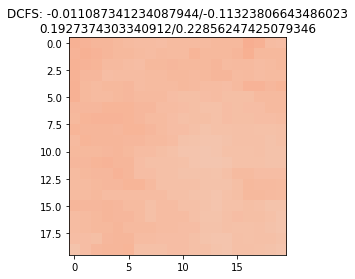

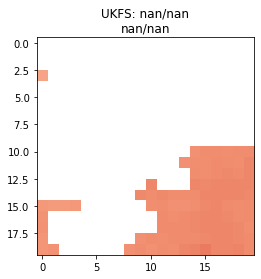

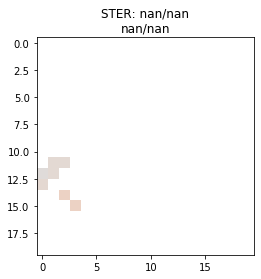

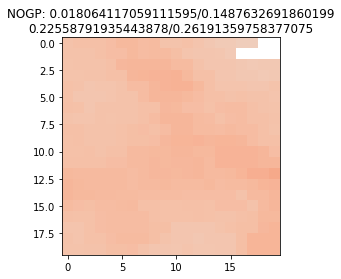

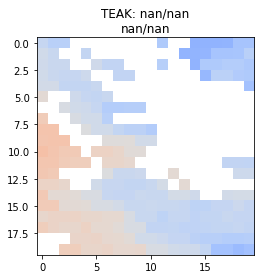

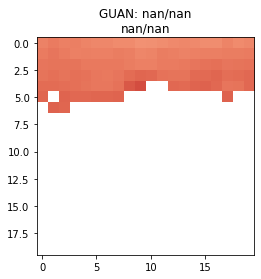

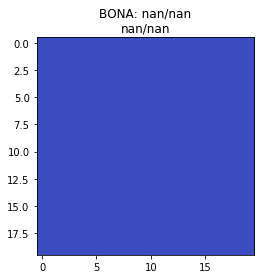

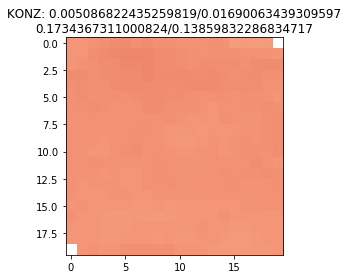

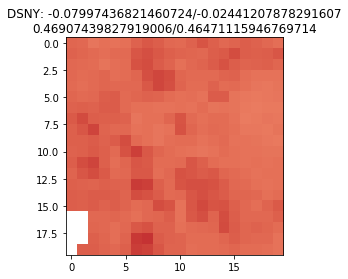

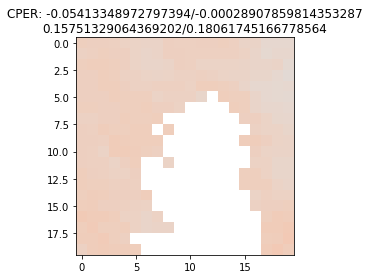

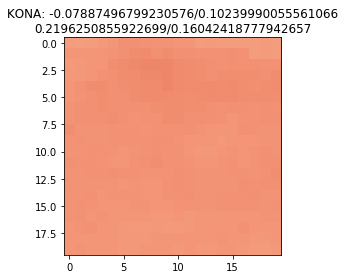

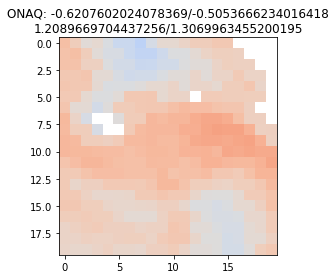

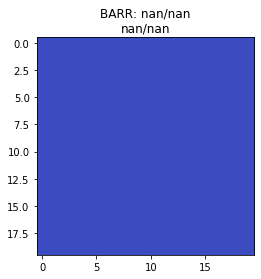

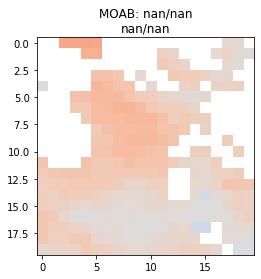

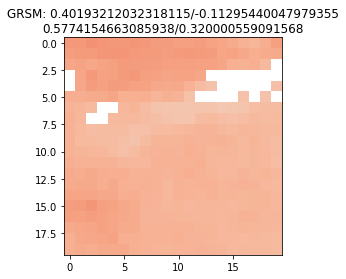

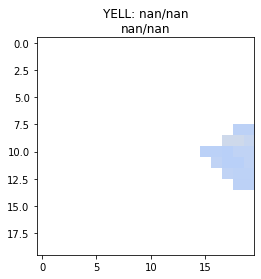

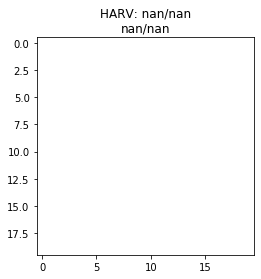

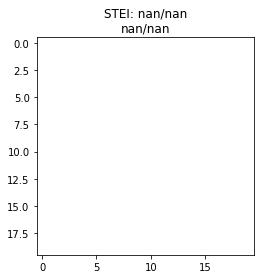

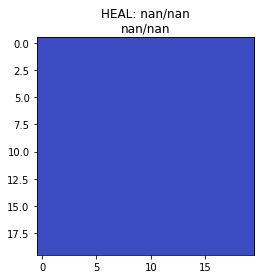

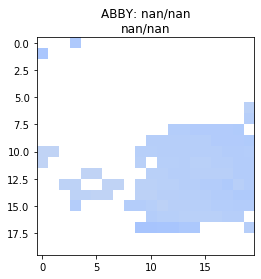

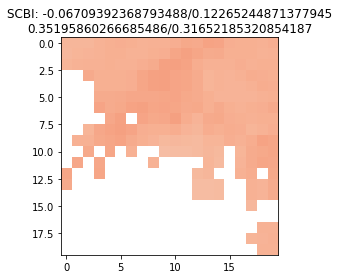

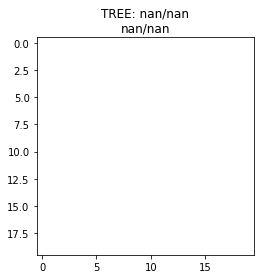

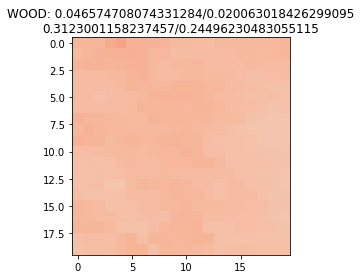

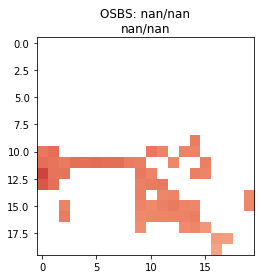

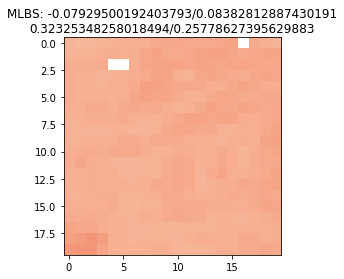

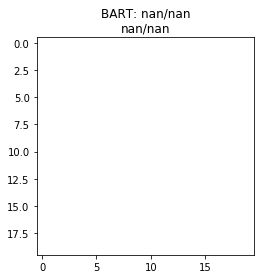

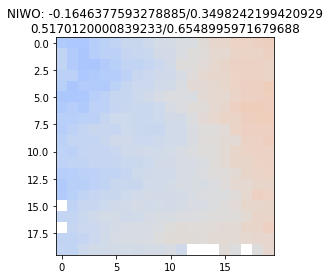

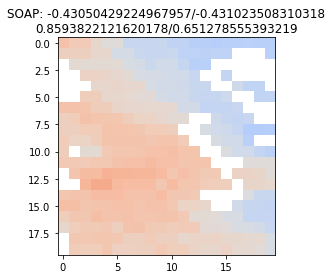

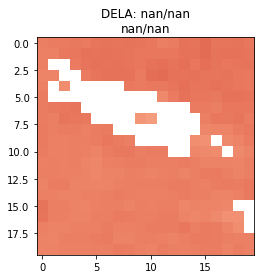

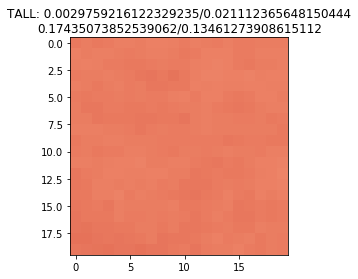

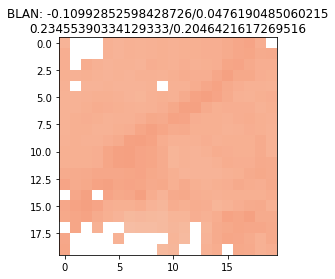

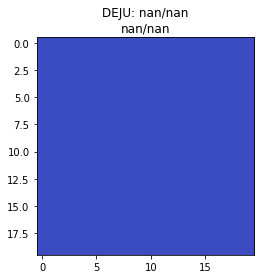

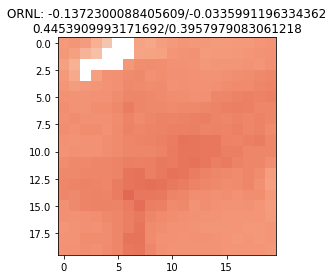

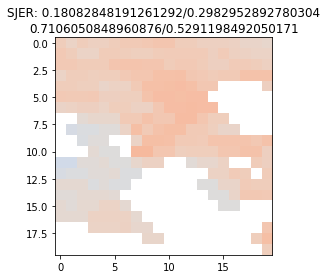

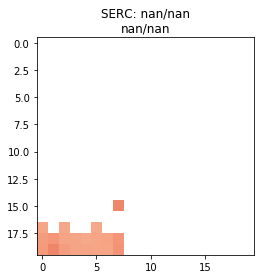

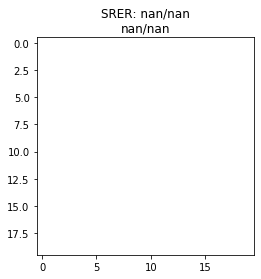

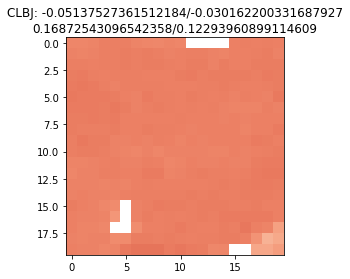

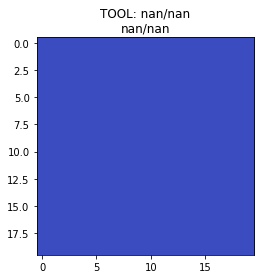

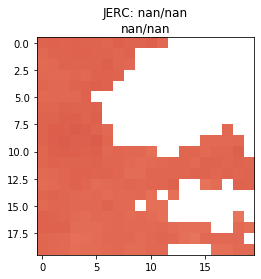

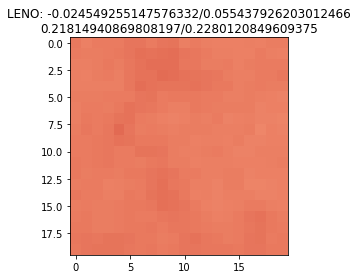

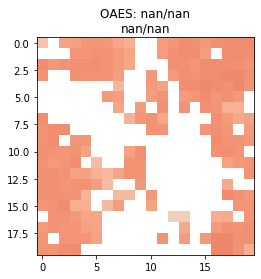

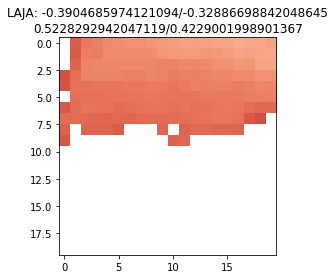

In [215]:
towsx=[]
towsy=[]
for i in range(len(grid['site'])):
    plt.figure()
    pos_x=grid['pos_x'][i]
    pos_y=grid['pos_y'][i]
    x,y=fp.index(grid['lon_central'][i],grid['lat_central'][i])
    towsx.append(x)
    towsy.append(y)
    data=tif[pos_y:pos_y+20,pos_x:pos_x+20]
    plt.imshow(data,vmin=260,vmax=305,cmap='coolwarm')
    nxg=maps['x_gradient'][i,i]/np.sqrt(maps['x_gradient'][i,i]**2+maps['y_gradient'][i,i]**2)
    nyg=maps['y_gradient'][i,i]/np.sqrt(maps['x_gradient'][i,i]**2+maps['y_gradient'][i,i]**2)
    plt.title(grid['site'][i]+': '+str(maps['x_gradient'][i,i])+'/'+str(maps['y_gradient'][i,i])+\
             '\n'+str(maps['x_gradient_abs'][i,i])+'/'+str(maps['y_gradient_abs'][i,i]))
    

(1300, 1500)

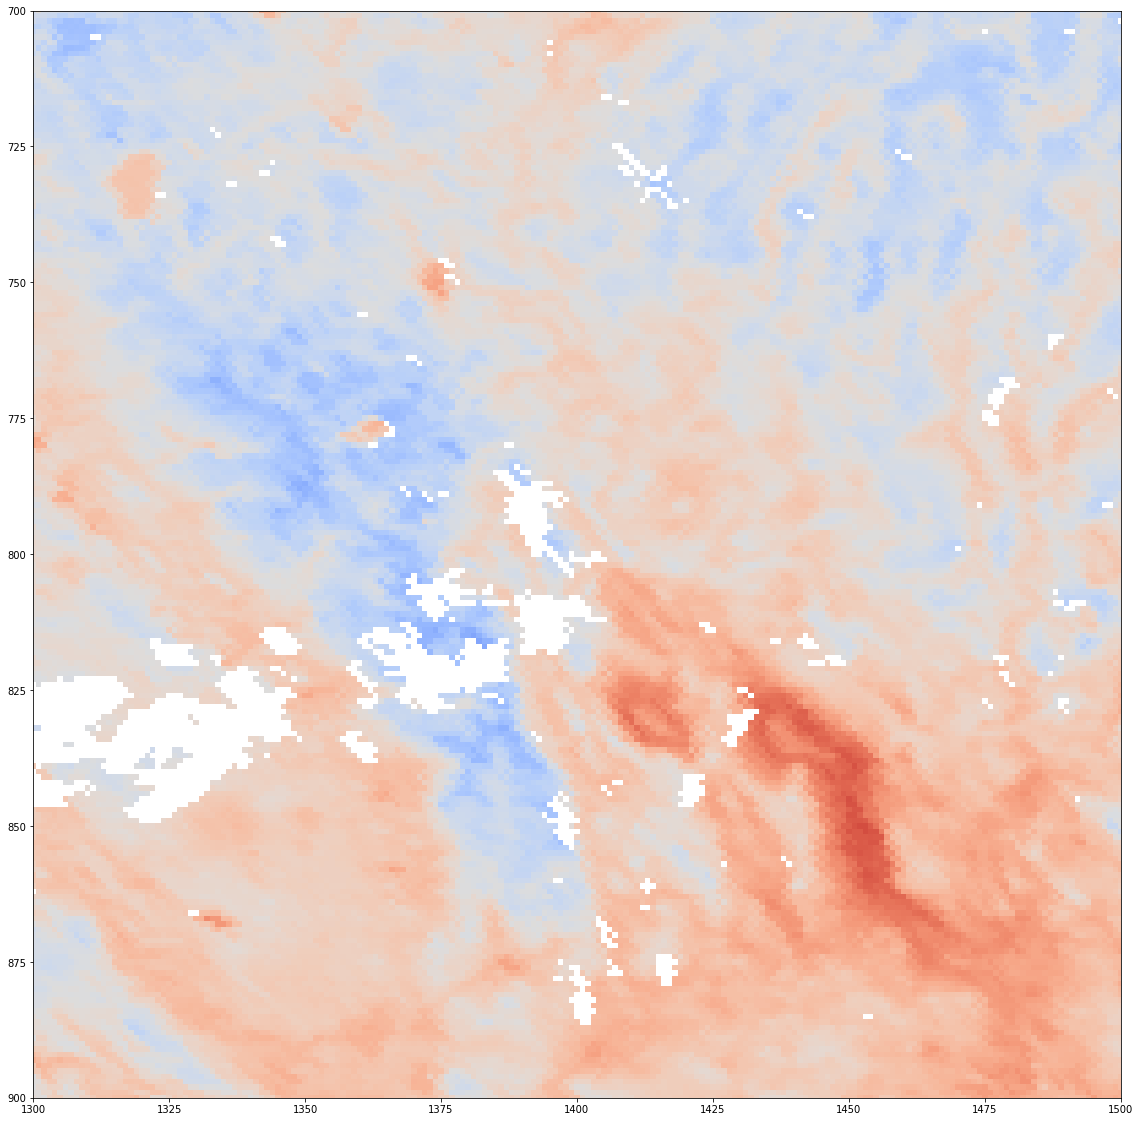

In [125]:
plt.figure(figsize=(20,20))
plt.imshow(tif,vmin=260,vmax=305,cmap='coolwarm')
plt.scatter(towsy,towsx,color='green')
plt.ylim(900,700)
plt.xlim(1300,1500)

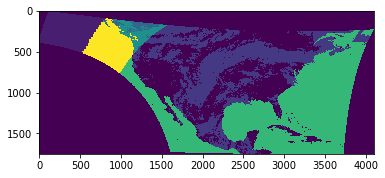

In [102]:
plt.imshow(dt)
#plt.hist(dt)

In [107]:
np.mean(dt)

5.3371687

In [36]:
tif2=tif[0:1500,1000:3500]
tif2[tif[0:1500,1000:3500]==0]=float('nan')

In [39]:
np.nanmin(tif2)

260.6925

In [40]:
np.nanmax(tif2)

304.4875

In [121]:
import os

In [ ]:
filelist=os.listdir('/stor/soteria/hydro/shared/data/GOES/GOES-16-EPSG4326/2018')
filelist.sort()
for file in filelist:
    fp=rasterio.open('/stor/soteria/hydro/shared/data/GOES/GOES-16-EPSG4326/2018/'+file)
    f1=fp.xy(0,0)
    if not (f1==f0):
        print(file)
        print(f1)
        f0=f1

(-140.6863349806942, 52.78257678532945)

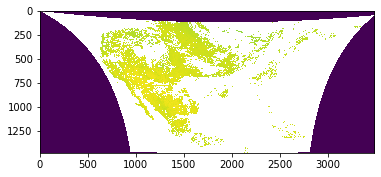

In [117]:
f='2017/OR_ABI-L2-LSTC-M3_G16_s20171701617190_e20171701619563_c20171701623041.tif'
fp=rasterio.open('/stor/soteria/hydro/shared/data/GOES/GOES-16-EPSG4326/'+f)
data=fp.read(1)
plt.imshow(data)
fp.xy(0,0)

(-151.85655029314734, 56.760794270401895)

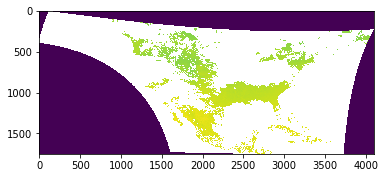

In [116]:
f='2018/OR_ABI-L2-LSTC-M4_G16_s20183381905185_e20183381905185_c20183381907312.tif'
fp=rasterio.open('/stor/soteria/hydro/shared/data/GOES/GOES-16-EPSG4326/'+f)
data=fp.read(1)
plt.imshow(data)
fp.xy(0,0)

In [163]:
data2=np.flipud(data)

In [166]:
import pickle

[ 0.9992811  -0.03791039]


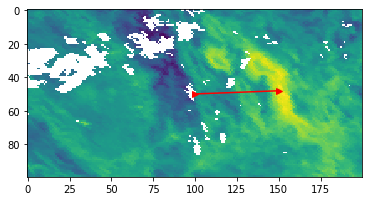

In [159]:
data=tif[800:900,1300:1500]
plt.imshow(data)
a=np.gradient(data)
dirct=np.array([np.nanmean(a[0]),np.nanmean(a[1])])/np.sqrt(np.nanmean(a[0])**2+np.nanmean(a[1])**2)
print(dirct)
plt.plot([100,dirct[0]*50+100],[50,dirct[1]*50+50],'r->')

In [165]:
a[0].shape
data.shape

(100, 200)

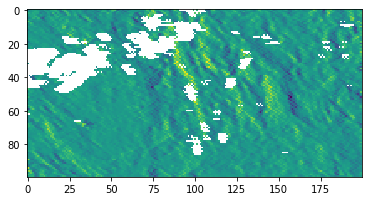

In [162]:
plt.imshow(a[1])

In [189]:
a=np.array([[1,2,3,2],[2,3,4,3],[3,4,5,4],[4,5,6,5]])

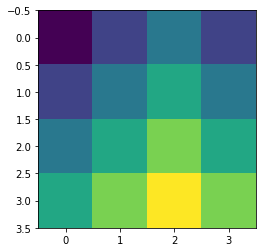

In [139]:
plt.imshow(a)

In [140]:
b=np.gradient(a)

In [141]:
b

[array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 array([[ 1.,  1.,  0., -1.],
        [ 1.,  1.,  0., -1.],
        [ 1.,  1.,  0., -1.],
        [ 1.,  1.,  0., -1.]])]

In [192]:
a=np.array([[1,2,3,2],[2,3,4,3],[3,4,5,4],[4,5,6,5]])
print(a)
aud = np.flipud(a.copy())
aud[aud<3]=0
print(aud)
print(a)

[[1 2 3 2]
 [2 3 4 3]
 [3 4 5 4]
 [4 5 6 5]]
[[4 5 6 5]
 [3 4 5 4]
 [0 3 4 3]
 [0 0 3 0]]
[[1 2 3 2]
 [2 3 4 3]
 [3 4 5 4]
 [4 5 6 5]]


In [219]:
maps=pickle.load(open('/home/tsw35/tyche/data/GOES/pickles/0.25x0.25_arcdegree/cl_2020-09-30 13:00:00p','rb'))
for k in maps.keys():
    print(k)

covariance_functions
maps
